# Wine Quality Prediction


In [3]:
# This is a regression problem where we have to predict the quality of wine based on a set of values for features
# Import all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [5]:
# Read the of the data into a dataframe (using pandas)

df = pd.read_csv('winequality-red.csv', sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [8]:
# Find correlations of each feature with the target variable (quality)

correlations = df.corr()['quality'].drop('quality')
print(correlations)


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


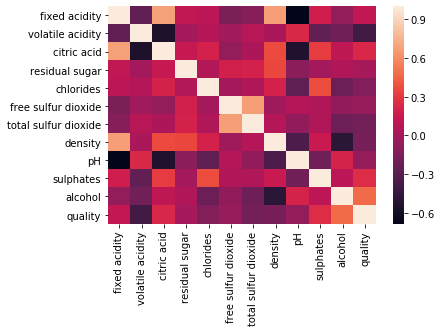

In [10]:
# Draw a detailed diagram of correlation: Heatmap using (sns)

sns.heatmap(df.corr())
plt.show()


In [37]:
# Define a function which returns features whose correlation is above a certain threshold value
# (passed as an input parameter to our function) 

def get_features(correlation_threshold):
    max_corrs = correlations.abs()
    high_correaltions = max_corrs
    high_correaltions =  max_corrs[max_corrs > correlation_threshold].index.values.tolist()

    return high_correaltions


In [43]:
# Create vector X of input features (predictor)containing all features whose correlation is above 0.05 
# And a vector y which is containing the quality (target variable)

features = get_features(0.1)
print(features)
x = df[features]
y = df['quality'] 
x

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4
5,7.4,0.660,0.00,0.075,40.0,0.99780,0.56,9.4
6,7.9,0.600,0.06,0.069,59.0,0.99640,0.46,9.4
7,7.3,0.650,0.00,0.065,21.0,0.99460,0.47,10.0
8,7.8,0.580,0.02,0.073,18.0,0.99680,0.57,9.5
9,7.5,0.500,0.36,0.071,102.0,0.99780,0.80,10.5


In [57]:
# Create training and testing set using train_test_split
# 25% of data is chosen for test and 75% is used for training

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
x_train.shape
y_train.shape 
x_test.shape 
y_test.shape

(400,)

In [42]:
# Build the linear regression model using LinearRegression()

regressor = LinearRegression()

# Fit the model to our training data

regressor.fit(x_train, y_train)

# Print the values of coefficients of each feature

print(regressor.coef_)

[ 5.71401063e-02 -1.05156404e+00 -1.75098273e-01 -1.34540580e+00
 -2.02547374e-03 -1.97573155e+01  8.50300047e-01  2.80859031e-01]


In [58]:
# Predict the quality of wine using our model (predict())

train_pred = regressor.predict(x_train)
print(train_pred)
test_pred = regressor.predict(x_test)
print(test_pred)



[5.36144941 5.37766853 5.98416194 ... 6.30262345 6.20939841 5.09354141]
[5.15283071 5.67953025 5.85590216 6.17766012 5.02046466 5.40634971
 5.07461935 6.14082176 5.49366602 5.8821023  5.64531719 5.29674728
 5.15428349 5.34468536 6.40838335 5.09499687 5.87507855 5.16762742
 6.04294003 6.28066841 6.45891527 5.55093695 5.82051478 4.9744651
 5.17723334 5.48191148 5.16796539 6.47324615 5.96258253 5.68528904
 6.05139983 6.30198006 4.94041251 5.88831081 5.1145699  5.90311819
 6.86863864 5.12671204 5.31492857 5.88831081 5.18251946 4.75643889
 6.51532745 5.45279541 5.26667253 5.8284522  5.68039287 5.17821857
 5.21873179 5.4414416  5.10489074 5.63997761 6.00397219 6.31115098
 5.43600809 5.3256197  5.0992145  4.94561503 5.22236884 5.10664613
 4.82468541 5.46194456 5.24588881 5.64560249 5.7868814  6.50037001
 5.36281411 5.69431996 5.21455544 6.01309322 5.62828578 5.61625622
 5.74118138 4.9903284  5.91876323 5.52390503 5.36908176 5.72981238
 5.6711092  5.68528904 6.1551785  5.28235481 4.68075083 5.

In [64]:
# Observe the differences between values (training and testing) predicted by the model and the actual values
# We use the root mean square error for this

rmse_train = metrics.mean_squared_error(train_pred, y_train) ** 0.5
print(rmse_train)

rmse_test = metrics.mean_squared_error(test_pred, y_test) ** 0.5
print(rmse_test)

### The RMSE for our training and testing sets are very similar which shows that our built model is a GOOD model ###

0.654831885086084
0.6288818933675823


In [65]:
# round off the predicted values of the test set

predicted_data = np.round_(test_pred)
print(predicted_data)



[5. 6. 6. 6. 5. 5. 5. 6. 5. 6. 6. 5. 5. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 6. 6. 5. 6. 5. 6. 7. 5. 5. 6. 5. 5. 7. 5. 5. 6. 6. 5.
 5. 5. 5. 6. 6. 6. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 7. 5. 6. 5. 6. 6. 6.
 6. 5. 6. 6. 5. 6. 6. 6. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 5. 5. 6.
 5. 5. 5. 7. 6. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 5. 7. 6. 5. 5. 5. 5. 6. 6.
 6. 5. 5. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 6. 7. 6. 6. 6. 5. 5. 6. 7. 5. 5.
 6. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5. 6. 6. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 5.
 5. 6. 6. 7. 5. 6. 6. 5. 6. 6. 5. 6. 7. 5. 6. 6. 6. 6. 6. 5. 6. 6. 6. 7.
 5. 5. 5. 5. 5. 6. 6. 5. 5. 5. 6. 6. 5. 6. 5. 6. 5. 5. 6. 5. 6. 6. 6. 6.
 6. 5. 5. 5. 5. 5. 6. 5. 6. 5. 7. 5. 5. 5. 6. 6. 5. 6. 5. 5. 5. 6. 6. 5.
 6. 6. 6. 5. 7. 6. 6. 5. 5. 6. 5. 5. 6. 5. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6.
 5. 6. 5. 6. 5. 5. 7. 5. 6. 6. 6. 6. 5. 5. 5. 5. 6. 5. 5. 6. 5. 6. 5. 5.
 5. 6. 5. 7. 5. 5. 6. 6. 5. 6. 7. 7. 6. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6. 5.
 6. 6. 6. 5. 5. 6. 5. 5. 6. 6. 7. 5. 5. 5. 6. 5. 5.

In [66]:
# Calculating other error functions

print('Mean Absolute Error:', metrics.mean_absolute_error(test_pred, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(test_pred, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_pred, y_test)))


Mean Absolute Error: 0.4868665495558334
Mean Squared Error: 0.3954924358055951
Root Mean Squared Error: 0.6288818933675823


In [67]:
# Display coefficients of each feature

coefficients = pd.DataFrame(regressor.coef_, features) 
coefficients.columns = ['Coefficient']
print(coefficients)

## These coefficients show the impact of each value on the 'quality' as the target when all other features are fixed.
## an increase of 1 in alcohol will lead an increase of 0.28 in the Quality
## A 1 increase of 1 in chlorides will cause a decrease of 1.34 in Quality

                      Coefficient
fixed acidity            0.057140
volatile acidity        -1.051564
citric acid             -0.175098
chlorides               -1.345406
total sulfur dioxide    -0.002025
density                -19.757316
sulphates                0.850300
alcohol                  0.280859
